In [ ]:
# Decision Tree, Random Forest 與 Adaboost 都可以做 multi-label classification
# 但是不能做 seq-to-seq


# Stacking

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd ./drive/MyDrive/NTU_ML2017_Hung-yi-Lee_HW/HW13

/content/drive/MyDrive/NTU_ML2017_Hung-yi-Lee_HW/HW13


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# pickup original data
def get_original_data(file_name):
  file_content = []
  with open(file_name, "r") as f:
    for line in f:
      line = line.replace("\n","")
      file_content.append([float(digit) for digit in line.split(" ")])
  x = np.array([data[:2] for data in file_content])
  y = np.array([data[2] for data in file_content])

  return x, y




In [ ]:
def draw_miku(x, y):

  label_0_index = (y == 0)

  plt.plot(x[label_0_index,0],-1 * x[label_0_index,1],"ko")

  plt.xticks([])  # 移除 x 軸刻度
  plt.yticks([])  # 移除 y 軸刻度
  plt.show()

(250000, 2)
(250000,)


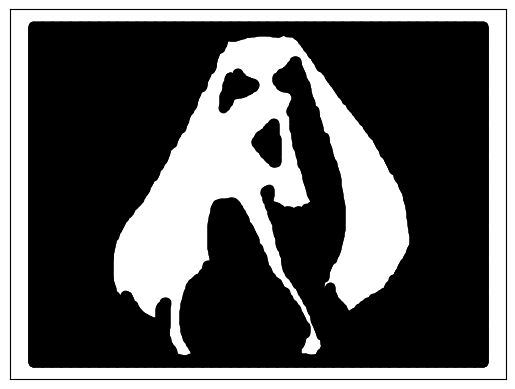

In [ ]:
original_x_np, original_y_np = get_original_data("miku.txt")
print(original_x_np.shape)
print(original_y_np.shape)
draw_miku(original_x_np, original_y_np)

[0. 0. 0. ... 0. 0. 0.]
Decision Tree Accuracy:  0.981672


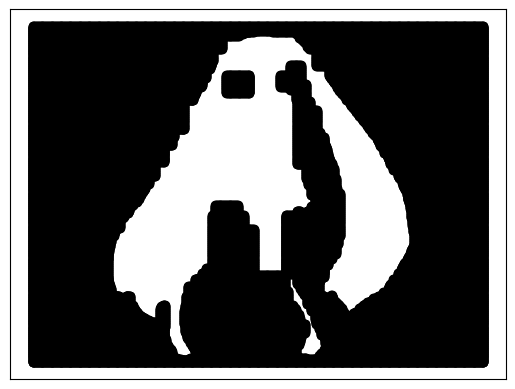

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 建立 Decision Tree 分類器
clf = DecisionTreeClassifier(max_depth=13,random_state=42)

# 訓練模型
clf.fit(original_x_np, original_y_np)

# 預測
y_pred = clf.predict(original_x_np) # output integer label like [0. 0. 0. ... 0. 0. 0.]

print(y_pred)

# 顯示結果
print("Decision Tree Accuracy: ", accuracy_score(original_y_np, y_pred))
draw_miku(original_x_np,y_pred)

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=["x", "y"])
print(tree_rules)

Random Forest Accuracy:  0.973276


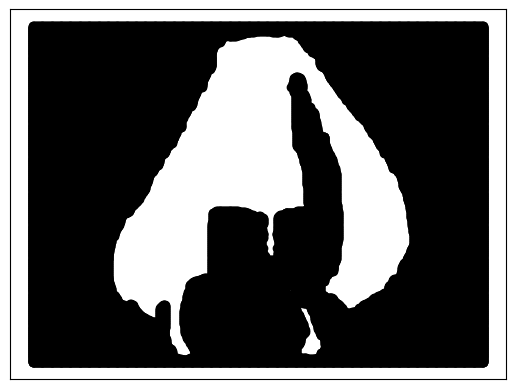

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest 分類器
clf = RandomForestClassifier(random_state=42, max_depth=11, n_estimators=100)

# 訓練模型
# 其中 Data 已經有 Resampling
clf.fit(original_x_np, original_y_np)

# 預測
y_pred = clf.predict(original_x_np)

# 顯示結果
print("Random Forest Accuracy: ", accuracy_score(original_y_np, y_pred))
draw_miku(original_x_np,y_pred)

AdaBoost Accuracy:  0.967816


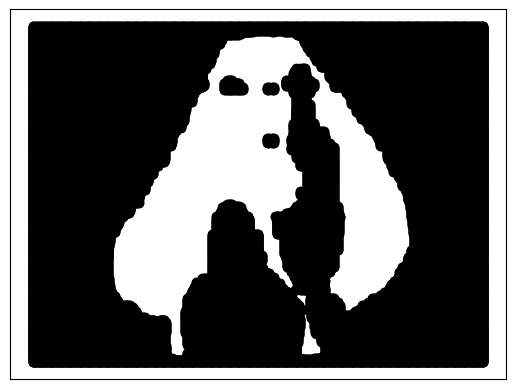

In [ ]:
# Adaboost


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 建立 AdaBoost 分類器
clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # 使用淺層決策樹作為基模型
    n_estimators=2000,  # 設定提升的迭代次數
    learning_rate=1.0,  # 設定學習率
    random_state=42
)

# 訓練模型
clf.fit(original_x_np, original_y_np)

# 預測
y_pred = clf.predict(original_x_np)


# 顯示結果
print("AdaBoost Accuracy: ", accuracy_score(original_y_np, y_pred))
draw_miku(original_x_np, y_pred)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [ ]:
class miku_data(Dataset):
  def __init__(self,x,y):
    self.x = torch.from_numpy(x)
    self.y = torch.from_numpy(y)

  def __getitem__(self, index):
    return self.x[index,:], self.y[index]

  def __len__(self):
    return self.x.shape[0]

In [ ]:

evaluate_index = int(0.2 * original_x_np.shape[0])
evaluate_x, evaluate_y = original_x_np[:evaluate_index,:], original_y_np[:evaluate_index]
train_x, train_y = original_x_np[evaluate_index:,:], original_y_np[evaluate_index:]

print(train_x.shape)
print(evaluate_x.shape)


(200000, 2)
(50000, 2)


In [ ]:
evaluate_dataset = miku_data(evaluate_x, evaluate_y)
train_dataset = miku_data(train_x, train_y)

evaluate_dataloader = DataLoader(evaluate_dataset, batch_size=128, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
class Model_A(nn.Module):
  def __init__(self):
    super(Model_A, self).__init__()
    self.Linear1 = nn.Linear(2, 10)
    self.Linear2 = nn.Linear(10, 1)
    self.Relu = nn.ReLU()
    self.Dropout1 = nn.Dropout(0.5)
    self.Dropout2 = nn.Dropout(0.5)
    # self.sigmoid  = nn.Sigmoid()

  def forward(self, x):
    x = self.Linear1(x)
    x = self.Dropout1(x)
    x = self.Relu(x)
    x = self.Linear2(x)
    x = self.Dropout2(x)
    # x = self.sigmoid(x)
    return x

In [ ]:
class Model_B(nn.Module):
  def __init__(self):
    super(Model_B, self).__init__()
    self.Linear1 = nn.Linear(2, 50)
    self.Linear2 = nn.Linear(50, 100)
    self.Linear3 = nn.Linear(100, 50)
    self.Linear4 = nn.Linear(50, 1)
    self.Relu = nn.ReLU()
    self.Dropout1 = nn.Dropout(0.5)
    self.Dropout2 = nn.Dropout(0.5)
    self.Dropout3 = nn.Dropout(0.5)
    self.Dropout4 = nn.Dropout(0.5)

    self.sigmoid  = nn.Sigmoid()

  def forward(self, x):
    x = self.Linear1(x)
    x = self.Dropout1(x)
    x = self.Relu(x)
    x = self.Linear2(x)
    x = self.Dropout2(x)
    x = self.Relu(x)
    x = self.Linear3(x)
    x = self.Dropout3(x)
    x = self.Relu(x)
    x = self.Linear4(x)
    x = self.Dropout4(x)
    x = self.sigmoid(x)
    return x

In [ ]:
class Model_C(nn.Module):
  def __init__(self):
    super(Model_C, self).__init__()
    self.Linear1 = nn.Linear(2, 1)
    self.Linear2 = nn.Linear(1, 150)
    self.Linear3 = nn.Linear(150, 1)
    self.Relu = nn.ReLU()
    self.Dropout1 = nn.Dropout(0.5)
    self.Dropout2 = nn.Dropout(0.5)
    self.Dropout3 = nn.Dropout(0.5)
    self.sigmoid  = nn.Sigmoid()

  def forward(self, x):
    x = self.Linear1(x)
    x = self.Dropout1(x)
    x = self.Relu(x)
    x = self.Linear2(x)
    x = self.Dropout2(x)
    x = self.Relu(x)
    x = self.Linear3(x)
    x = self.Dropout3(x)
    x = self.sigmoid(x)
    return x

In [ ]:
class Model_D(nn.Module):
  def __init__(self):
    super(Model_D, self).__init__()
    self.Linear1 = nn.Linear(2, 64)
    self.Linear2 = nn.Linear(64, 256)
    self.Linear3 = nn.Linear(256, 1024)
    self.Linear4 = nn.Linear(1024, 256)
    self.Linear5 = nn.Linear(256, 64)
    self.Linear6 = nn.Linear(64, 1)
    self.Relu = nn.ReLU()
    self.Dropout1 = nn.Dropout(0.5)
    self.Dropout2 = nn.Dropout(0.5)
    self.Dropout3 = nn.Dropout(0.5)
    self.Dropout4 = nn.Dropout(0.5)
    self.Dropout5 = nn.Dropout(0.5)
    self.Dropout6 = nn.Dropout(0.5)
    self.sigmoid  = nn.Sigmoid()

  def forward(self, x):
    x = self.Linear1(x)
    x = self.Dropout1(x)
    x = self.Relu(x)
    x = self.Linear2(x)
    x = self.Dropout2(x)
    x = self.Relu(x)
    x = self.Linear3(x)
    x = self.Dropout3(x)
    x = self.Relu(x)
    x = self.Linear4(x)
    x = self.Dropout4(x)
    x = self.Relu(x)
    x = self.Linear5(x)
    x = self.Dropout5(x)
    x = self.Relu(x)
    x = self.Linear6(x)
    x = self.Dropout6(x)
    x = self.sigmoid(x)
    return x

In [ ]:
class Evaluator(nn.Module):
  def __init__(self):
    super(Evaluator , self).__init__()
    self.Linear1 = nn.Linear(4, 10)
    self.Linear2 = nn.Linear(10, 1)
    self.Relu = nn.ReLU()
    self.Dropout1 = nn.Dropout(0.5)
    self.Dropout2 = nn.Dropout(0.5)
    self.sigmoid  = nn.Sigmoid()

  def forward(self, x):
    x = self.Linear1(x)
    x = self.Dropout1(x)
    x = self.Relu(x)
    x = self.Linear2(x)
    x = self.Dropout2(x)
    x = self.sigmoid(x)
    return x

In [ ]:
model_A = Model_A()

learning_rate_A = 0.5
optimizer_A = torch.optim.Adam(model_A.parameters(), lr=learning_rate_A)
epoch_A = 25
loss_fn_A = nn.CrossEntropyLoss()


100%|██████████| 50/50 [08:09<00:00,  9.80s/it]


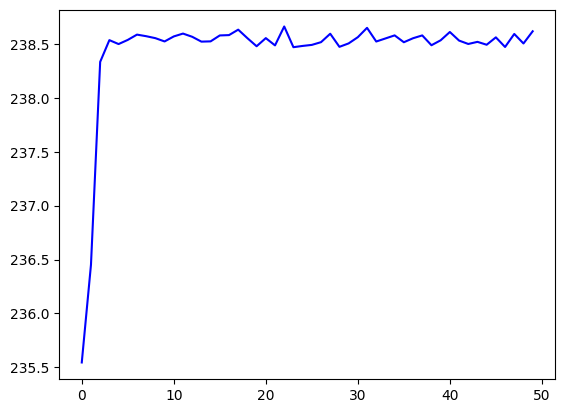

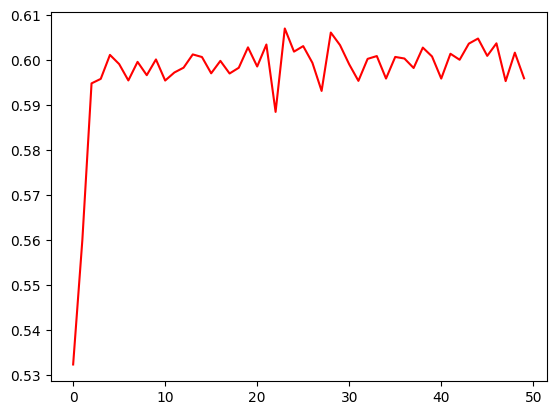

In [ ]:
from tqdm import tqdm
import sys

total_train_loss = []
total_train_acc = []

for i in tqdm(range(epoch_A)):


  model_A.train()
  this_train_loss = []
  this_train_acc = []


  for batch_x, batch_y in train_dataloader:

    optimizer_A.zero_grad()

    model_A = model_A.to("cpu").to(torch.float64)
    batch_x = batch_x.to("cpu").to(torch.float64)
    batch_y = batch_y.to("cpu").to(torch.float32).reshape((-1))








    pred_y = model_A(batch_x).to(torch.float32).squeeze(1)

    # print(batch_y.shape)
    # print(pred_y.shape)

    # print(batch_y.reshape(-1))
    # print(pred_y.reshape(-1))



    loss = loss_fn_A(pred_y, batch_y) #y_hat 與 pred_y 都放 float32 就行了 // 要是一維
    this_train_loss.append(loss.item())
    this_train_acc.append( (pred_y.round() == batch_y).sum().item() / batch_y.shape[0] )

    # print(loss.reshape(-1).item())

    # sys.exit()


    loss.backward()
    optimizer_A.step()


  total_train_loss.append(sum(this_train_loss)/len(this_train_loss))
  total_train_acc.append(sum(this_train_acc)/len(this_train_acc))

  model_A.eval()

plt.plot(list(range(epoch_A)),total_train_loss,"b")
plt.show()
plt.plot(list(range(epoch_A)),total_train_acc,"r")
plt.show()

In [ ]:
model_B = Model_B()

learning_rate_B = 0.5
optimizer_B = torch.optim.Adam(model_B.parameters(), lr=learning_rate_B)
epoch_B = 5
loss_fn_B = nn.CrossEntropyLoss()


100%|██████████| 5/5 [00:51<00:00, 10.39s/it]


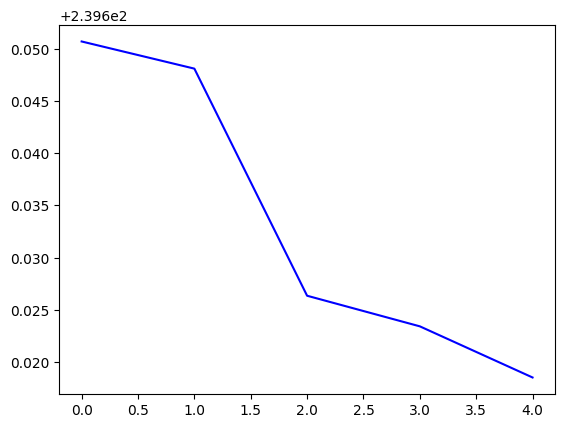

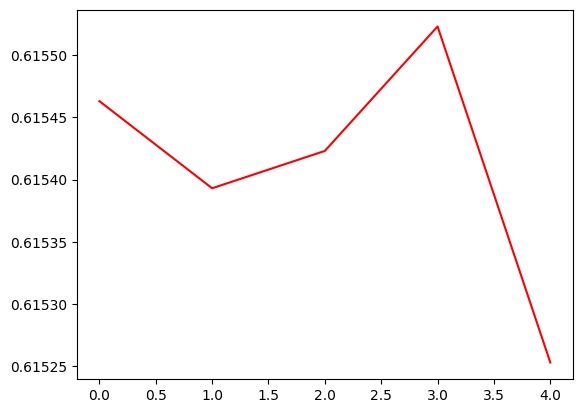

In [ ]:
from tqdm import tqdm
import sys

total_train_loss = []
total_train_acc = []

for i in tqdm(range(epoch_B)):


  model_B.train()
  this_train_loss = []
  this_train_acc = []


  for batch_x, batch_y in train_dataloader:

    optimizer_B.zero_grad()

    model_B = model_B.to("cpu").to(torch.float64)
    batch_x = batch_x.to("cpu").to(torch.float64)
    batch_y = batch_y.to("cpu").to(torch.float32).reshape((-1))








    pred_y = model_B(batch_x).to(torch.float32).squeeze(1)

    # print(batch_y.shape)
    # print(pred_y.shape)

    # print(batch_y.reshape(-1))
    # print(pred_y.reshape(-1))



    loss = loss_fn_B(pred_y, batch_y) #y_hat 與 pred_y 都放 float32 就行了 // 要是一維
    this_train_loss.append(loss.item())
    this_train_acc.append( (pred_y.round() == batch_y).sum().item() / batch_y.shape[0] )

    # print(loss.reshape(-1).item())

    # sys.exit()


    loss.backward()
    optimizer_B.step()


  total_train_loss.append(sum(this_train_loss)/len(this_train_loss))
  total_train_acc.append(sum(this_train_acc)/len(this_train_acc))

  model_B.eval()

plt.plot(list(range(epoch_B)),total_train_loss,"b")
plt.show()
plt.plot(list(range(epoch_B)),total_train_acc,"r")
plt.show()

In [ ]:
model_C = Model_C()

learning_rate_C = 0.08
optimizer_C = torch.optim.Adam(model_C.parameters(), lr=learning_rate_C)
epoch_C = 5
loss_fn_C = nn.CrossEntropyLoss()


100%|██████████| 5/5 [00:39<00:00,  7.98s/it]


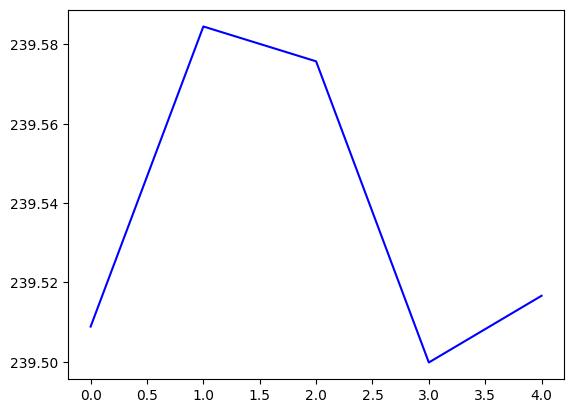

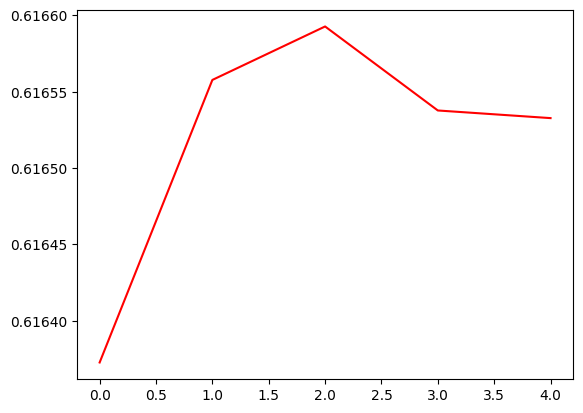

In [ ]:
from tqdm import tqdm
import sys

total_train_loss = []
total_train_acc = []

for i in tqdm(range(epoch_C)):


  model_C.train()
  this_train_loss = []
  this_train_acc = []


  for batch_x, batch_y in train_dataloader:

    optimizer_C.zero_grad()

    model_C = model_C.to("cpu").to(torch.float64)
    batch_x = batch_x.to("cpu").to(torch.float64)
    batch_y = batch_y.to("cpu").to(torch.float32).reshape((-1))








    pred_y = model_C(batch_x).to(torch.float32).squeeze(1)

    # print(batch_y.shape)
    # print(pred_y.shape)

    # print(batch_y.reshape(-1))
    # print(pred_y.reshape(-1))



    loss = loss_fn_C(pred_y, batch_y) #y_hat 與 pred_y 都放 float32 就行了 // 要是一維
    this_train_loss.append(loss.item())
    this_train_acc.append( (pred_y.round() == batch_y).sum().item() / batch_y.shape[0] )

    # print(loss.reshape(-1).item())

    # sys.exit()


    loss.backward()
    optimizer_C.step()


  total_train_loss.append(sum(this_train_loss)/len(this_train_loss))
  total_train_acc.append(sum(this_train_acc)/len(this_train_acc))


plt.plot(list(range(epoch_C)),total_train_loss,"b")
plt.show()
plt.plot(list(range(epoch_C)),total_train_acc,"r")
plt.show()

In [ ]:
model_D = Model_D()

learning_rate_D = 0.5
optimizer_D = torch.optim.Adam(model_D.parameters(), lr=learning_rate_D)
epoch_D = 5
loss_fn_D = nn.CrossEntropyLoss()


100%|██████████| 5/5 [06:44<00:00, 80.95s/it]


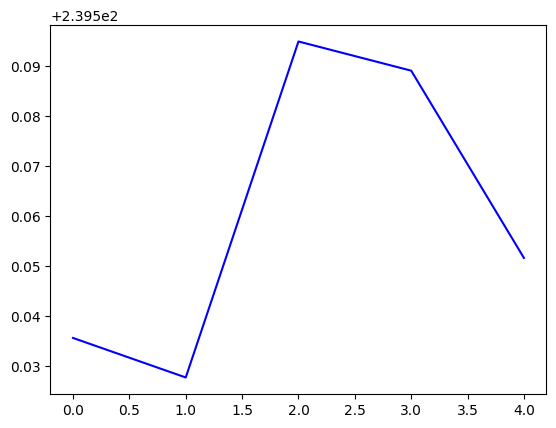

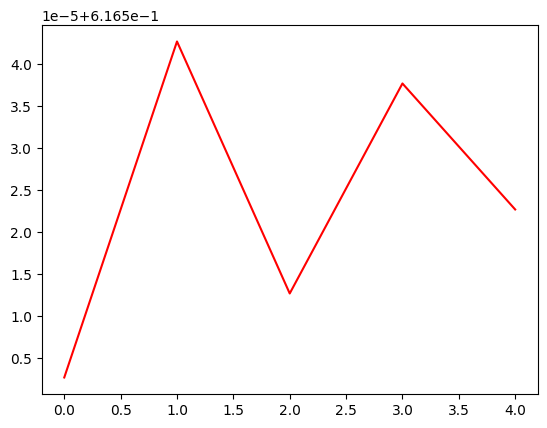

In [ ]:
from tqdm import tqdm
import sys

total_train_loss = []
total_train_acc = []

for i in tqdm(range(epoch_D)):


  model_D.train()
  this_train_loss = []
  this_train_acc = []


  for batch_x, batch_y in train_dataloader:

    optimizer_D.zero_grad()

    model_D = model_D.to("cpu").to(torch.float64)
    batch_x = batch_x.to("cpu").to(torch.float64)
    batch_y = batch_y.to("cpu").to(torch.float32).reshape((-1))








    pred_y = model_D(batch_x).to(torch.float32).squeeze(1)

    # print(batch_y.shape)
    # print(pred_y.shape)

    # print(batch_y.reshape(-1))
    # print(pred_y.reshape(-1))



    loss = loss_fn_D(pred_y, batch_y) #y_hat 與 pred_y 都放 float32 就行了 // 要是一維
    this_train_loss.append(loss.item())
    this_train_acc.append( (pred_y.round() == batch_y).sum().item() / batch_y.shape[0] )

    # print(loss.reshape(-1).item())

    # sys.exit()


    loss.backward()
    optimizer_D.step()


  total_train_loss.append(sum(this_train_loss)/len(this_train_loss))
  total_train_acc.append(sum(this_train_acc)/len(this_train_acc))

  model_D.eval()

plt.plot(list(range(epoch_D)),total_train_loss,"b")
plt.show()
plt.plot(list(range(epoch_D)),total_train_acc,"r")
plt.show()

In [ ]:
model_E = Evaluator()

learning_rate_E = 0.008
optimizer_E = torch.optim.Adam(model_E.parameters(), lr=learning_rate_E)
epoch_E = 20
loss_fn_E = nn.CrossEntropyLoss()


100%|██████████| 20/20 [01:46<00:00,  5.33s/it]


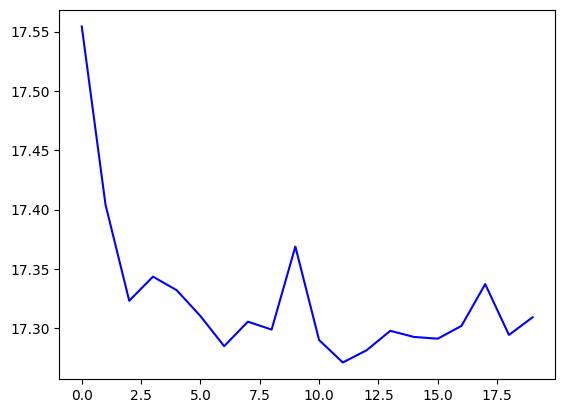

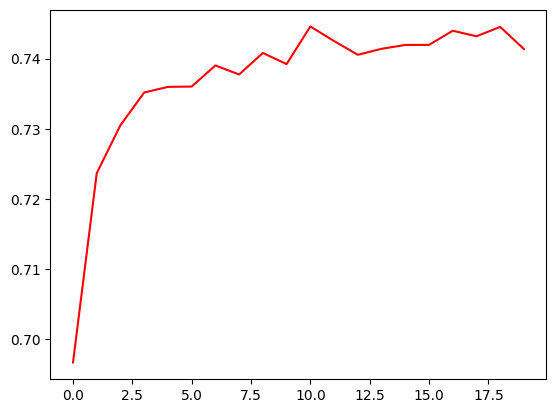

In [ ]:
from tqdm import tqdm
import sys

total_train_loss = []
total_train_acc = []

for i in tqdm(range(epoch_E)):


  model_E.train()
  this_train_loss = []
  this_train_acc = []


  for batch_x, batch_y in evaluate_dataloader:

    optimizer_E.zero_grad()

    model_E = model_E.to("cpu").to(torch.float64)
    batch_x = batch_x.to("cpu").to(torch.float64)
    batch_y = batch_y.to("cpu").to(torch.float32).reshape((-1))


    model_A.eval()
    model_B.eval()
    model_C.eval()
    model_D.eval()

    with torch.no_grad():
      pred_A = model_A(batch_x).to(torch.float32)
      pred_B = model_B(batch_x).to(torch.float32)
      pred_C = model_C(batch_x).to(torch.float32)
      pred_D = model_D(batch_x).to(torch.float32)


      batch_x = torch.cat((pred_A.detach(),pred_B.detach(),pred_C.detach(),pred_D.detach()),1).to(torch.float64)
      # print(batch_x.shape)


    pred_y = model_E(batch_x).to(torch.float32).squeeze(1)

    # print(batch_y.shape)
    # print(pred_y.shape)

    # print(batch_y.reshape(-1))
    # print(pred_y.reshape(-1))



    loss = loss_fn_E(pred_y, batch_y) #y_hat 與 pred_y 都放 float32 就行了 // 要是一維
    this_train_loss.append(loss.item())
    this_train_acc.append( (pred_y.round() == batch_y).sum().item() / batch_y.shape[0] )

    # print(loss.reshape(-1).item())

    # sys.exit()


    loss.backward()
    optimizer_E.step()


  total_train_loss.append(sum(this_train_loss)/len(this_train_loss))
  total_train_acc.append(sum(this_train_acc)/len(this_train_acc))

  model_E.eval()

plt.plot(list(range(epoch_E)),total_train_loss,"b")
plt.show()
plt.plot(list(range(epoch_E)),total_train_acc,"r")
plt.show()